In [14]:
import numpy as np 
from scipy.special import comb 
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [7]:
np.array([comb(25, i) * (0.2 ** i) * (0.8 ** (25-i)) for i in range(1, 26)]).sum()

0.9962221068137057

In [27]:
rfc = RandomForestClassifier(random_state=2
                            ,n_estimators=25
                            , oob_score=True)

In [28]:
wine = load_wine()
X = wine.data
y = wine.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, oob_score=True, random_state=2)

In [31]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [32]:
rfc.estimators_[0].random_state

1872583848

In [33]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


In [34]:
rfc.oob_score_

0.9596774193548387

In [13]:
import numpy as np
from scipy.special import comb 
import matplotlib.pyplot as plt 

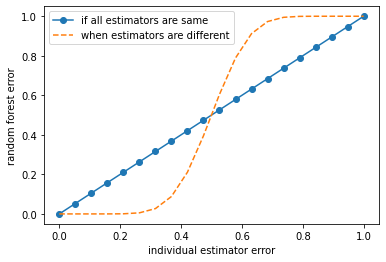

In [15]:
x = np.linspace(0, 1, 20)
y = []

for epsilon in x:
    
    # 注意 scipy.special.comb的用法
    E = np.array([comb(25, i) * (epsilon ** i) * ((1 - epsilon) ** (25 - i)) for i in range(13, 26)]).sum()
    y.append(E)

fig, ax = plt.subplots()
ax.plot(x, x, 'o-', label='if all estimators are same')
ax.plot(x, y, '--', label='when estimators are different')
ax.set_xlabel('individual estimator error')
ax.set_ylabel('random forest error')
ax.legend()